In [1]:
import importlib
import random
import os

In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import dataset
import texts
import config
import model
from config import *

In [4]:
importlib.reload(dataset)
importlib.reload(texts)
importlib.reload(config)
importlib.reload(model)
from config import *

In [5]:
ds = dataset.generate_dataset(10)

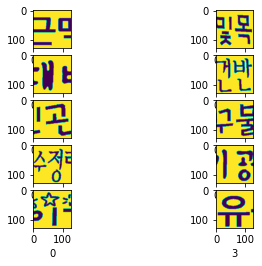

In [6]:
fig = plt.figure()
for i in range(ds[0].shape[0]):
    ax = plt.subplot(5, 2, 1+i)
    ax.imshow(Image.fromarray((ds[0][i]*255).clip(0, 255).astype(np.uint8).squeeze()))
    ax.set_xlabel(ds[1][i])

In [7]:
def train_1epoch(model):
    ds_img, ds_lbl = dataset.generate_dataset()
    model.fit(ds_img, ds_lbl, epochs=1)

In [8]:
def build_model():
    mdl = model.get_model()
    mdl.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return mdl

In [9]:
mdl = build_model()

In [10]:
for i in range(10):
    train_1epoch(mdl)

32/32 [==============================] - 1s 22ms/step - loss: 0.0806 - accuracy: 0.9720


In [11]:
mdl.save('trained_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: trained_model\assets
